# **Classification of IRIS flowers using non-ensemble techniques**
Non-ensemble methods is a machine learning technique that uses only single algorithm for predictions .
## Understanding the IRIS Dataset
This dataset can be used in explaining classification problem.We use Scikit learn library to import the dataset.This dataset quantifies the morphologic variation of Iris flowers of three related species. The data set consists of 150 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.This dataset became a typical test case for many statistical classification techniques in machine learning.When a new flower is given,we need to predict to which type it belongs to.

![iris_species](https://user-images.githubusercontent.com/87603633/152629958-822ae55d-bc3b-4022-8cff-92b52a25a3a6.png)


* iris.DESCR > Complete description of dataset
* iris.data > Data to learn. Each training set is 4 digit array of features. Total 150 training sets
* iris.feature_names > Array of all 4 feature ['sepal length (cm)','sepal width cm)','petal length (cm)','petal width (cm)']

* iris.target > The classification label. For every training set there is one classification label(0,1,2). Here 0 for setosa, 1 for versicolor and 2 for virginica
* iris.target_names  >> ['setosa', 'versicolor', 'virginica']


## Importing the required Libraries
* pandas: Used for data manipulation and analysis
* numpy : Numpy is the core library for scientific computing in Python. It is used for working with arrays and matrices.
* datasets: Here we are going to use ‘iris’ dataset
* model_selection: Here we are going to use model_selection.train_test_split() for splitting the data
* tree: Here we are going to decision tree classifier
* graphviz: Is used to export the tree into Graphviz format using the export_graphviz exporter

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from sklearn import tree
import graphviz

## Load The Data

In [ ]:
iris = datasets.load_iris()
print('Dataset structure= ', dir(iris))

df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
df['flower_species'] = df.target.apply(lambda x : iris.target_names[x]) 
# Each value from 'target' is used as index to get corresponding value from 'target_names' 

print('Unique target values=',df['target'].unique())

df.sample(5)

Dataset structure=  ['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
Unique target values= [0 1 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_species
32,5.2,4.1,1.5,0.1,0,setosa
146,6.3,2.5,5.0,1.9,2,virginica
75,6.6,3.0,4.4,1.4,1,versicolor
0,5.1,3.5,1.4,0.2,0,setosa
134,6.1,2.6,5.6,1.4,2,virginica


# Creating Feature Matrix

In [ ]:
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df[['target']]

print('X shape=', X.shape)
print('y shape=', y.shape)

X shape= (150, 4)
y shape= (150, 1)


### Creating Train and Test Dataset
* We will split the dataset, so that we can use one set of data for training the model and one set of data for testing the model
* We will keep 20% of data for testing and 80% of data for training the model

In [ ]:
X_train,X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.2, random_state= 1)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_test dimension= ', y_test.shape)

X_train dimension=  (120, 4)
X_test dimension=  (30, 4)
y_train dimension=  (120, 1)
y_test dimension=  (30, 1)


## DECISION TREES

Decision tree is a machine learning  algorithm which belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms decision tree can be used to solve regression and classification problems. The goal of decision tree is to create training model that can predict class(single or multi) or value by learning simple decision rules from training data.
Decision tree form a flow chart like structure that's why they are very easy to interpret and understand. It is one of the few ML algorithm where its very easy to visualize and analyze the internal working of algorithm.

Just like flowchart, decision tree contains different types of nodes and branches. Every decision node represent the test on feature and based on the test result it will either form another branch or the leaf node. Every branch represents the decision rule and leaf node represent the final outcome.

![Decision_Tree](https://user-images.githubusercontent.com/87603633/152629741-536471df-a391-49bc-bd59-b1787c42ce87.png)





## Creating Decision Tree Classifier and training the model

In [ ]:
cls = tree.DecisionTreeClassifier(random_state= 1)
cls.fit(X_train ,y_train)

DecisionTreeClassifier(random_state=1)

### Testing The Model

We are going to predict some specific species from the test data (10th, 20th and 29th)

In [ ]:
print('Actual value of species for 10th training example=',iris.target_names[y_test.iloc[10]][0])
print('Predicted value of species for 10th training example=', iris.target_names[cls.predict([X_test.iloc[10]])][0])

print('\nActual value of species for 20th training example=',iris.target_names[y_test.iloc[20]][0])
print('Predicted value of species for 20th training example=', iris.target_names[cls.predict([X_test.iloc[20]])][0])

print('\nActual value of species for 30th training example=',iris.target_names[y_test.iloc[29]][0])
print('Predicted value of species for 30th training example=', iris.target_names[cls.predict([X_test.iloc[29]])][0])

Actual value of species for 10th training example= versicolor
Predicted value of species for 10th training example= versicolor

Actual value of species for 20th training example= versicolor
Predicted value of species for 20th training example= versicolor

Actual value of species for 30th training example= virginica
Predicted value of species for 30th training example= virginica


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


### Model Score
Check the model score using test data

In [ ]:
cls.score(X_test, y_test)

0.9666666666666667

## Visualize The Decision Tree
We will use plot_tree() function from sklearn to plot the tree and then export the tree in Graphviz format using the export_graphviz exporter. Results will be saved in iris_decision_tree.pdf file

[Text(0.4, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5, 0.75, 'X[3] <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.2, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.3, 0.4166666666666667, 'X[0] <= 6.05\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.25, 'X[3] <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5833333333333334, 'X[2] <= 4.85\ngini = 0.048\nsamples = 41\nvalue = [0, 1, 40]'),
 Text(0.7, 0.4166666666666667, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]

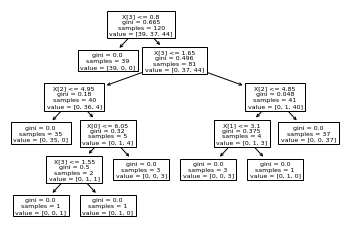

In [ ]:
tree.plot_tree(cls) 

In [ ]:
dot_data = tree.export_graphviz(cls, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris_decision_tree") 

'iris_decision_tree.pdf'

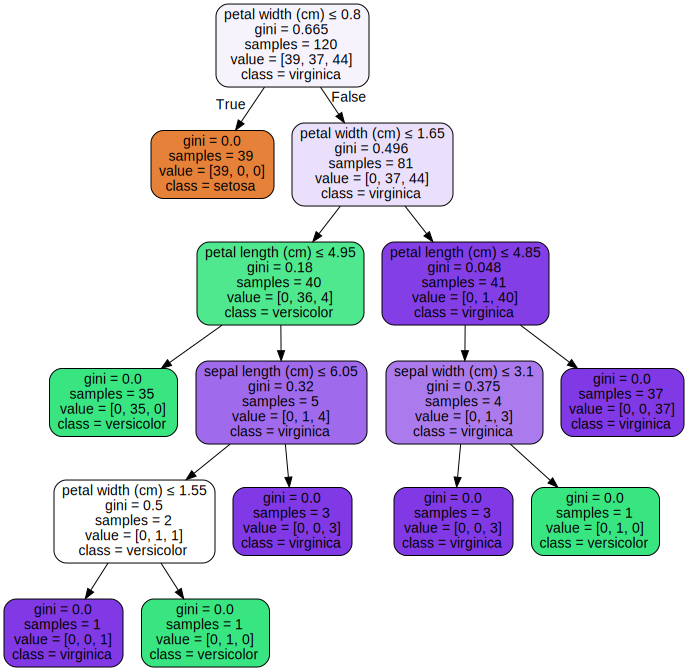

In [ ]:
dot_data = tree.export_graphviz(cls, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## LOGISTIC REGRESSION
Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables. The outcome can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.

In Logistic regression, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1).
The curve from the logistic function indicates the likelihood of something such as whether the cells are cancerous or not, a mouse is obese or not based on its weight, etc.
Logistic Regression is a significant machine learning algorithm because it has the ability to provide probabilities and classify new data using continuous and discrete datasets.
Logistic Regression can be used to classify the observations using different types of data and can easily determine the most effective variables used for the classification. The below image is showing the logistic function:

<img src="https://image3.slideserve.com/6047919/logistic-regression-curve-l.jpg" id="img" style="width: 616px; height: 462px;">

### Training and Testing the LOGISTIC REGRESSION model

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train ,y_train)
y_predict=lr.predict(X_test)
y_predict

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

### Calculating the accuracy score

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.9666666666666667

### Display the Confusion matrix
The confusion matrix helps you to see how the model performed.It tells you the number of True positives,true negatives,false positives and false negatives.To see the confusion matrix,use:

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

# SUPPORT VECTOR CLASSIFIER

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine. Consider the below diagram in which there are two different categories that are classified using a decision boundary or hyperplane:

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20201211185229/Capture.JPG" srcset="https://media.geeksforgeeks.org/wp-content/uploads/20201211185229/Capture.JPG,">

* Import the SVC Model from sklearn
* Training and Testing the model





In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
pred=svc.predict(X_test)
pred

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

### Know the accuracy score of the model

In [ ]:
accuracy_score(y_test,pred)

0.9666666666666667

### Displayig the confusion matrix

In [ ]:
confusion_matrix(y_test,pred)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])